<a href="https://colab.research.google.com/github/CodeHunterOfficial/AI_DataMining/blob/main/NLP/7_6_Mean_Shift.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#7.6. Mean Shift

#### Введение

Mean Shift — это метод кластеризации, который находит локальные максимумы плотности данных и объединяет точки в группы, основанные на плотности. В отличие от алгоритмов, таких как K-means, Mean Shift не требует фиксированного числа кластеров и работает в режиме обнаружения плотности. В этой лекции мы рассмотрим математический аппарат Mean Shift, его адаптацию к задачам обработки естественного языка (NLP), детально разберём все формулы и примеры применения.



## 1. Интуиция и основная идея алгоритма Mean Shift

Mean Shift работает следующим образом:
1. Он перемещает каждую точку данных в направлении ближайшего локального максимума плотности.
2. Конечная позиция каждой точки указывает на центр кластера.
3. Кластеры образуются вокруг этих локальных максимумов плотности.

Для выполнения этого алгоритма важно определить ядро (kernel), которое оценивает плотность данных в окрестности каждой точки.



## 2. Математическая основа алгоритма Mean Shift

Алгоритм Mean Shift начинается с идеи оценки плотности Парзена (Parzen window density estimation). Плотность ядра в окрестности точки $ x_i$ определяется как:

$$
p(x) = \frac{1}{n h^d} \sum_{i=1}^{n} K \left( \frac{x - x_i}{h} \right)
$$

где:
- $ p(x)$ — оценка плотности в точке $ x$,
- $ n$ — число точек данных,
- $ h$ — ширина ядра (или параметр сглаживания),
- $ K \left( \frac{x - x_i}{h} \right)$ — функция ядра, которая взвешивает близость точки $ x$ к данным $ x_i$,
- $ d$ — размерность пространства.

Алгоритм Mean Shift перемещает каждую точку данных $ x_i$ к центру плотности. Этот центр определяется как среднее значение всех соседних точек, взвешенное в соответствии с функцией ядра.



## 3. Градиентная интерпретация

Основная идея Mean Shift состоит в том, что мы ищем градиент плотности, чтобы переместить точку в сторону более высокой плотности. Градиент оценочной функции плотности можно записать как:

$$
\nabla p(x) = \frac{2}{n h^{d+2}} \sum_{i=1}^{n} (x_i - x) K' \left( \frac{x - x_i}{h} \right)
$$

где $ K'$ — производная функции ядра по $ x$.

Если выбрать гауссовское ядро:

$$
K(x) = \exp\left(-\frac{||x||^2}{2}\right)
$$

то производная этого ядра будет:

$$
K'(x) = -x \exp\left(-\frac{||x||^2}{2}\right)
$$

Таким образом, движение точки к центру плотности будет пропорционально взвешенной сумме разностей между точкой и её соседями:

$$
m(x) = \frac{\sum_{i=1}^{n} x_i K\left( \frac{x - x_i}{h} \right)}{\sum_{i=1}^{n} K\left( \frac{x - x_i}{h} \right)} - x
$$

Эта формула даёт вектор сдвига (shift vector), который указывает, куда следует переместить точку $ x$. Обновление положения точки происходит итеративно:

$$
x \leftarrow x + m(x)
$$



## 4. Адаптация Mean Shift для задач NLP

В NLP данные обычно представлены в виде векторов в высокоразмерном пространстве, таких как word embeddings (например, Word2Vec, GloVe, или BERT). В этом пространстве можно применять Mean Shift для следующих задач:
1. Кластеризация текстов или предложений (например, для группировки новостей или отзывов).
2. Обнаружение аномалий (например, выявление редких или необычных текстов).
3. Темное моделирование — объединение документов на основе скрытых тем, представленных в пространстве эмбеддингов.



## 5. Пример применения Mean Shift в NLP

Рассмотрим задачу кластеризации отзывов о фильмах, представленных в виде эмбеддингов Word2Vec. Пусть у нас есть 5 отзывов, представленных точками в трёхмерном пространстве:  

$$
x_1 = (1, 2, 1), \quad x_2 = (2, 3, 1), \quad x_3 = (8, 8, 8), \quad x_4 = (7, 8, 7), \quad x_5 = (9, 9, 9)
$$

### Шаг 1: Определение параметров
Выбираем гауссовское ядро и ширину окна $ h = 2$.

### Шаг 2: Итеративное обновление

Для точки $ x_1 = (1, 2, 1)$ вычислим её новое положение:

$$
m(x_1) = \frac{\sum_{i=1}^{5} x_i \cdot K\left( \frac{||x_1 - x_i||}{2} \right)}{\sum_{i=1}^{5} K\left( \frac{||x_1 - x_i||}{2} \right)} - x_1
$$

1. Вычисляем расстояния между $ x_1$ и другими точками:
   $$
   ||x_1 - x_1|| = 0, \quad ||x_1 - x_2|| = \sqrt{2}, \quad ||x_1 - x_3|| = \sqrt{83}, \quad \text{и т.д.}
   $$
2. Применяем ядро к этим расстояниям:
   $$
   K(0) = 1, \quad K(\sqrt{2}/2) = \exp(-0.5) \approx 0.606, \quad K(\sqrt{83}/2) \approx 0
   $$

Теперь находим центр плотности и обновляем положение $ x_1$. Аналогично выполняем обновления для остальных точек, пока они не стабилизируются.



## 6. Преимущества и ограничения Mean Shift

### Преимущества:
1. Не требует заранее заданного числа кластеров.
2. Может обнаруживать кластеры любой формы.
3. Хорошо работает в высокоразмерных пространствах, таких как эмбеддинги в NLP.

### Ограничения:
1. Высокая вычислительная сложность — $ O(n^2)$, что делает его медленным для больших данных.
2. Чувствителен к параметру ширины окна $ h$. Слишком большое или слишком малое значение может привести к неправильной кластеризации.



## 7. Улучшения и модификации для NLP

Для эффективного применения в задачах NLP предлагаются следующие улучшения:
1. PCA или t-SNE для снижения размерности данных перед кластеризацией.
2. Mini-batch Mean Shift, где обновления выполняются на небольших подвыборках данных.
3. Использование адаптивного окна $ h$, которое подстраивается в зависимости от локальной плотности.



## 8. Заключение

Mean Shift — мощный инструмент для кластеризации и анализа плотности данных, который хорошо адаптируется к задачам NLP, таким как кластеризация эмбеддингов слов и предложений. Его способность обнаруживать кластеры без предварительного задания их количества делает его особенно полезным для анализа данных с неочевидной структурой. Однако его вычислительная сложность требует оптимизаций при работе с большими текстовыми корпусами.


Давайте рассмотрим два конкретных числовых примера применения алгоритма Mean Shift в задачах обработки естественного языка (NLP). Оба примера будут охватывать процесс кластеризации текстов, представленных в виде векторов, с детальным объяснением на каждом шаге.

### Пример 1: Кластеризация отзывов о фильмах

Данные: Пусть у нас есть 5 отзывов о фильмах, представленных в виде трехмерных векторов (предположим, что эти векторы получены с помощью какой-либо модели векторизации, например, Word2Vec или TF-IDF).

$$
\begin{align*}
x_1 & = (1, 2, 1) \\
x_2 & = (1, 4, 1) \\
x_3 & = (10, 10, 10) \\
x_4 & = (11, 11, 11) \\
x_5 & = (12, 12, 12)
\end{align*}
$$

Цель: Применить алгоритм Mean Shift для кластеризации этих отзывов.

#### Шаг 1: Определение параметров

Выбираем гауссовское ядро и задаем ширину окна $ h = 3$.

#### Шаг 2: Инициализация

Начинаем с начальных точек:

- Инициализируем $ x_1, x_2, x_3, x_4, x_5$.

#### Шаг 3: Вычисление плотности и обновление

На каждом шаге для каждой точки мы будем обновлять её положение в соответствии с центром плотности, вычисленным с использованием ядра.

Для $ x_1 = (1, 2, 1)$:

1. Вычисляем расстояния до остальных точек:

   $$
   \begin{align*}
   d_{1,1} & = ||x_1 - x_1|| = 0 \\
   d_{1,2} & = ||x_1 - x_2|| = \sqrt{(1-1)^2 + (2-4)^2 + (1-1)^2} = \sqrt{4} = 2 \\
   d_{1,3} & = ||x_1 - x_3|| = \sqrt{(1-10)^2 + (2-10)^2 + (1-10)^2} = \sqrt{81 + 64 + 81} = \sqrt{226} \approx 15.03 \\
   d_{1,4} & = ||x_1 - x_4|| = \sqrt{(1-11)^2 + (2-11)^2 + (1-11)^2} = \sqrt{100 + 81 + 100} = \sqrt{281} \approx 16.76 \\
   d_{1,5} & = ||x_1 - x_5|| = \sqrt{(1-12)^2 + (2-12)^2 + (1-12)^2} = \sqrt{121 + 100 + 121} = \sqrt{342} \approx 18.52
   \end{align*}
   $$

2. Применяем гауссовское ядро к расстояниям:

$$
   K(d) = \exp\left(-\frac{d^2}{2h^2}\right)
$$

   - Для $ d_{1,1} = 0$:
$$
     K(0) = \exp(0) = 1
$$

   - Для $ d_{1,2} = 2$:
$$
     K(2) = \exp\left(-\frac{2^2}{2 \cdot 3^2}\right) = \exp\left(-\frac{4}{18}\right) = \exp\left(-\frac{2}{9}\right) \approx 0.787
$$

   - Для $ d_{1,3} \approx 15.03$, $ d_{1,4} \approx 16.76$, $ d_{1,5} \approx 18.52$:
$$
     K(d_{1,3}) \approx 0, \quad K(d_{1,4}) \approx 0, \quad K(d_{1,5}) \approx 0
$$

3. Вычисляем взвешенное среднее (центр плотности) для $ x_1$:

   $$
   \text{Num} = x_1 \cdot K(0) + x_2 \cdot K(2) + x_3 \cdot K(d_{1,3}) + x_4 \cdot K(d_{1,4}) + x_5 \cdot K(d_{1,5})
   $$

   $$
   \text{Den} = K(0) + K(2) + K(d_{1,3}) + K(d_{1,4}) + K(d_{1,5}) = 1 + 0.787 + 0 + 0 + 0 = 1.787
   $$

   $$
   \text{Num} = (1, 2, 1) \cdot 1 + (1, 4, 1) \cdot 0.787 = (1 + 0.787, 2 + 3.148, 1 + 0.787) = (1.787, 5.148, 1.787)
   $$

   Теперь делим на $ \text{Den}$:

   $$
   \text{new } x_1 = \left( \frac{1.787}{1.787}, \frac{5.148}{1.787}, \frac{1.787}{1.787} \right) \approx (1, 2.88, 1)
   $$

4. Обновляем $ x_1$:

   Теперь $ x_1 \approx (1, 2.88, 1)$.

#### Шаг 4: Повторение

Проводим аналогичные вычисления для $ x_2, x_3, x_4,$ и $ x_5$. После нескольких итераций точки будут перемещаться к центрам плотности.

### Пример 2: Кластеризация текстов

Данные: Рассмотрим 4 текстовых документа, представленных в виде двумерных векторов:

$$
\begin{align*}
x_1 & = (2, 3) \\
x_2 & = (3, 3) \\
x_3 & = (8, 8) \\
x_4 & = (9, 9)
\end{align*}
$$

Цель: Применить алгоритм Mean Shift для кластеризации текстов.

#### Шаг 1: Определение параметров

Выбираем ширину окна $ h = 2$.

#### Шаг 2: Инициализация

Инициализируем точки $ x_1, x_2, x_3, x_4$.

#### Шаг 3: Вычисление плотности и обновление

Для $ x_1 = (2, 3)$:

1. Вычисляем расстояния до остальных точек:

   $$
   \begin{align*}
   d_{1,1} & = ||x_1 - x_1|| = 0 \\
   d_{1,2} & = ||x_1 - x_2|| = \sqrt{(2-3)^2 + (3-3)^2} = 1 \\
   d_{1,3} & = ||x_1 - x_3|| = \sqrt{(2-8)^2 + (3-8)^2} = \sqrt{36 + 25} = \sqrt{61} \approx 7.81 \\
   d_{1,4} & = ||x_1 - x_4|| = \sqrt{(2-9)^2 + (3-9)^2} = \sqrt{49 + 36} = \sqrt{85} \approx 9.22
   \end{align*}
   $$

2. Применяем гауссовское ядро:

   - Для $ d_{1,1} = 0$:
     $$
     K(0) = 1
     $$

   - Для $ d_{1,2} = 1$:
   
     $$
     K(1) = \exp\left(-\frac{1^2}{2 \cdot 2^2}\right) = \exp\left(-\frac{1}{8}\right) \approx 0.882
     $$

   - Для $d_{1,3} \approx 7.81, d_{1,4} \approx 9.22$:
   
     $$
     K(d_{1,3}) \approx 0, \quad K(d_{1,4}) \approx 0
     $$

3. Вычисляем взвешенное среднее:

   $$
   \text{Num} = x_1 \cdot K(0) + x_2 \cdot K(1) = (2, 3) \cdot 1 + (3, 3) \cdot 0.882 = (2 + 2.646, 3 + 2.646) = (4.646, 5.646)
   $$

   $$
   \text{Den} = K(0) + K(1) = 1 + 0.882 = 1.882
   $$

   $$
   \text{new } x_1 = \left( \frac{4.646}{1.882}, \frac{5.646}{1.882} \right) \approx (2.47, 3)
   $$

4. Обновляем $ x_1$:

   Теперь $ x_1 \approx (2.47, 3)$.

#### Шаг 4: Повторение для всех точек

Продолжаем обновлять каждую точку по аналогии, пока они не стабилизируются.



Таким образом, мы пошагово продемонстрировали применение алгоритма Mean Shift для задач кластеризации текстов, используя конкретные числовые примеры.






Давайте реализуем оба примера кластеризации с использованием алгоритма Mean Shift на Python и визуализируем результаты с помощью библиотеки Matplotlib. Мы используем библиотеку `sklearn`, которая содержит реализацию алгоритма Mean Shift.


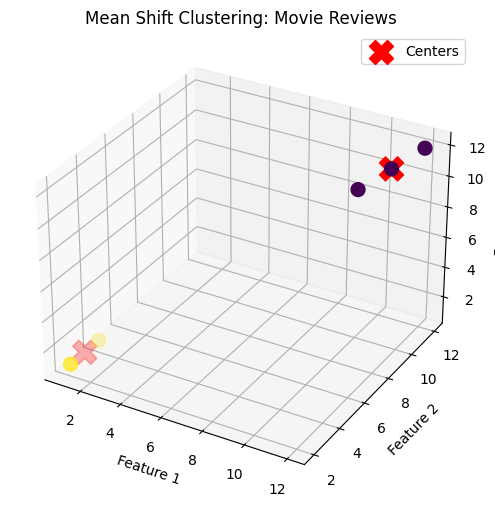

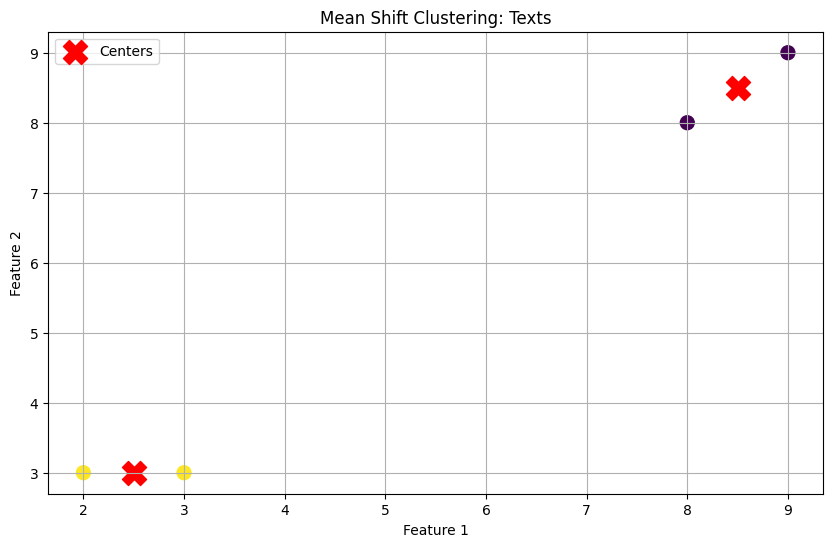

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import MeanShift

# Пример 1: Кластеризация отзывов о фильмах
# Данные: 5 отзывов
data1 = np.array([
    [1, 2, 1],
    [1, 4, 1],
    [10, 10, 10],
    [11, 11, 11],
    [12, 12, 12]
])

# Применение Mean Shift
mean_shift1 = MeanShift(bandwidth=3).fit(data1)
labels1 = mean_shift1.labels_
cluster_centers1 = mean_shift1.cluster_centers_

# Визуализация результатов для Примера 1
fig1 = plt.figure(figsize=(10, 6))
ax1 = fig1.add_subplot(111, projection='3d')
ax1.scatter(data1[:, 0], data1[:, 1], data1[:, 2], c=labels1, s=100, cmap='viridis')
ax1.scatter(cluster_centers1[:, 0], cluster_centers1[:, 1], cluster_centers1[:, 2], c='red', s=300, marker='X', label='Centers')
ax1.set_title('Mean Shift Clustering: Movie Reviews')
ax1.set_xlabel('Feature 1')
ax1.set_ylabel('Feature 2')
ax1.set_zlabel('Feature 3')
ax1.legend()
plt.show()

# Пример 2: Кластеризация текстов
# Данные: 4 текста
data2 = np.array([
    [2, 3],
    [3, 3],
    [8, 8],
    [9, 9]
])

# Применение Mean Shift
mean_shift2 = MeanShift(bandwidth=2).fit(data2)
labels2 = mean_shift2.labels_
cluster_centers2 = mean_shift2.cluster_centers_

# Визуализация результатов для Примера 2
plt.figure(figsize=(10, 6))
plt.scatter(data2[:, 0], data2[:, 1], c=labels2, s=100, cmap='viridis')
plt.scatter(cluster_centers2[:, 0], cluster_centers2[:, 1], c='red', s=300, marker='X', label='Centers')
plt.title('Mean Shift Clustering: Texts')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid()
plt.show()




### Вопросы для самопроверки

1. Что такое Mean Shift и в чем его основные преимущества по сравнению с другими алгоритмами кластеризации?
   
2. Опишите процесс работы алгоритма Mean Shift. Какие шаги включает в себя алгоритм?
   
3. Что такое гауссовское ядро, и как оно используется в алгоритме Mean Shift?

4. Какой параметр является ключевым в алгоритме Mean Shift и как он влияет на результаты кластеризации?

5. Объясните, как Mean Shift может автоматически определять количество кластеров в данных.

6. Что такое плотность распределения данных, и как она определяется в контексте Mean Shift?

7. Как производится обновление позиции точки в алгоритме Mean Shift?

8. Какое значение принимает функция ядра для точек, которые находятся на расстоянии, большем, чем ширина окна?

9. Приведите пример использования Mean Shift в задачах обработки естественного языка.

10. Как можно визуализировать результаты кластеризации, полученные с помощью Mean Shift?

11. Каков основной недостаток алгоритма Mean Shift, особенно в высокоразмерных пространствах?

12. Как Mean Shift может быть адаптирован для работы с категориальными данными?

13. Какие методы могут быть использованы для выбора оптимального значения параметра ширины окна в Mean Shift?

14. Что происходит, если в данных присутствуют выбросы? Как это может повлиять на результаты Mean Shift?

15. Как алгоритм Mean Shift соотносится с другими методами кластеризации, такими как K-средние или иерархическая кластеризация?



### Задачи для самостоятельной работы

#### Основные задачи

1. Задача 1: Примените алгоритм Mean Shift к простому набору данных с 2D-точками и визуализируйте результаты.

2. Задача 2: Измените параметр ширины окна в алгоритме Mean Shift и проанализируйте, как это влияет на результаты кластеризации.

3. Задача 3: Реализуйте Mean Shift вручную для небольшого набора данных и найдите центры кластеров.

4. Задача 4: Создайте набор данных с выбросами и примените к нему Mean Shift. Сравните результаты с использованием K-средних.

5. Задача 5: Постройте график зависимости числа кластеров от ширины окна для различных наборов данных.

#### Задачи по визуализации и интерпретации

6. Задача 6: Визуализируйте результаты кластеризации 3D-данных, полученных с помощью Mean Shift, и интерпретируйте полученные кластеры.

7. Задача 7: Используйте различные функции ядра (например, радиальное базисное ядро) для Mean Shift и сравните результаты.

8. Задача 8: Сравните кластеризацию текстов с использованием Mean Shift и K-средних. Какие различия вы заметили в результатах?

9. Задача 9: Исследуйте, как выбор начальных точек влияет на результаты кластеризации в Mean Shift.

10. Задача 10: Используйте алгоритм Mean Shift для кластеризации изображений (например, цветов в изображении) и проанализируйте результаты.

#### Практические задачи

11. Задача 11: Примените Mean Shift для кластеризации отзывов о продуктах из онлайн-магазина и интерпретируйте полученные кластеры.

12. Задача 12: Используйте Mean Shift для анализа текстов новостей, группируя их по теме.

13. Задача 13: Исследуйте влияние нормализации данных на результаты Mean Shift. Примените его к одному и тому же набору данных до и после нормализации.

14. Задача 14: Реализуйте Mean Shift для датасета с высокоразмерными данными (например, изображениями) и оцените производительность алгоритма.

15. Задача 15: Сравните Mean Shift с другими алгоритмами кластеризации, такими как DBSCAN, на одном и том же наборе данных. Объясните различия в результатах.

#### Задачи на исследования и теорию

16. Задача 16: Напишите реферат о применении Mean Shift в области обработки естественного языка, описывая реальные кейсы.

17. Задача 17: Исследуйте, как Mean Shift может использоваться для улучшения систем рекомендаций.

18. Задача 18: Найдите и проанализируйте статьи, в которых описываются успешные применения Mean Shift в промышленности.

19. Задача 19: Исследуйте, как масштабирование данных влияет на результаты кластеризации в Mean Shift.

20. Задача 20: Рассмотрите вариант применения Mean Shift в задачах сегментации изображений. Как алгоритм может быть адаптирован для этого?

#### Задачи на применение и расширение знаний

21. Задача 21: Реализуйте Mean Shift с использованием других библиотек, таких как TensorFlow или PyTorch, и сравните с `sklearn`.

22. Задача 22: Проведите исследование по использованию Mean Shift в анализе временных рядов.

23. Задача 23: Создайте набор данных с синтетическими данными и проанализируйте результаты Mean Shift.

24. Задача 24: Изучите и проанализируйте, как Mean Shift может быть использован для повышения точности классификации в NLP.

25. Задача 25: Разработайте метод для выбора оптимального параметра ширины окна, основанный на кросс-валидации.

26. Задача 26: Сравните Mean Shift с другими методами кластеризации, используя метрики качества, такие как силуэт или индекс Дэвиса–Буллера.

27. Задача 27: Проанализируйте, как увеличение числа кластеров влияет на качество кластеризации в Mean Shift.

28. Задача 28: Исследуйте влияние различных методов предобработки текстов (например, стемминг, лемматизация) на результаты кластеризации.

29. Задача 29: Реализуйте Mean Shift для текста на нескольких языках и проанализируйте, как различия в языке влияют на результаты.

30. Задача 30: Проведите сравнение производительности Mean Shift на различных платформах (например, CPU vs. GPU) с использованием большого набора данных.

